In [7]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [8]:
import pandas as pd

import json

with open('reviews.json') as json_data:
    d = json.load(json_data)

In [9]:
from pandas.io.json import json_normalize
data = json_normalize(d[:])
data_frame = pd.DataFrame.from_dict(data, orient='columns')
df = data_frame.applymap(str)
df.head()

,author,body,date,helpful,rating,title
0,['Lauren Walsh'],['Ridiculously small. You are mislead by the p...,"['on April 9, 2018']",[],['1.0 out of 5 stars'],['One Star']
1,['Bradey Christensen'],['Only one works. The one that does is mediocr...,"['on April 9, 2018']",[],['1.0 out of 5 stars'],['The one that does is mediocre at best.']
2,['John Weber'],"['Most: size, uses 2A battery, adjustable ligh...","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
3,['K Reed'],"['Awesome little light, highly recommend']","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
4,['BW'],"['Durable, lightweight and very bright']","['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']


In [6]:
df.rating.describe()

count                       1360
unique                         5
top       ['5.0 out of 5 stars']
freq                         863
Name: rating, dtype: object

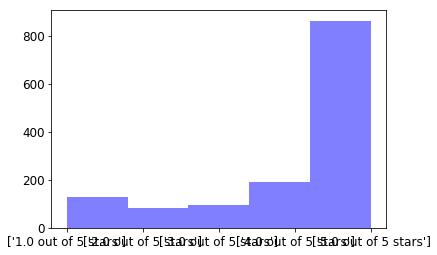

In [22]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(df.rating, 5, facecolor='blue', alpha=0.5)
plt.show()

In [24]:
df.columns
df.index

RangeIndex(start=0, stop=1360, step=1)

In [25]:
df.describe()

,author,body,date,helpful,rating,title
count,1360,1360,1360,1360,1360,1360
unique,820,924,341,10,5,624
top,['Amazon Customer'],['Great product'],"['on April 9, 2018']",[],['5.0 out of 5 stars'],['Five Stars']
freq,135,8,34,1136,863,317


In [26]:
df['rating'].value_counts()

['5.0 out of 5 stars']    863
['4.0 out of 5 stars']    191
['1.0 out of 5 stars']    128
['3.0 out of 5 stars']     94
['2.0 out of 5 stars']     84
Name: rating, dtype: int64

In [52]:
df['helpful'].value_counts()

[]                                                  1136
['\n      One person found this helpful.\n    ']     134
['\n      2 people found this helpful.\n    ']        53
['\n      3 people found this helpful.\n    ']        18
['\n      4 people found this helpful.\n    ']         8
['\n      5 people found this helpful.\n    ']         3
['\n      6 people found this helpful.\n    ']         3
['\n      15 people found this helpful.\n    ']        2
['\n      8 people found this helpful.\n    ']         2
['\n      214 people found this helpful.\n    ']       1
Name: helpful, dtype: int64

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(lowercase=True, stop_words='english',ngram_range=(2, 2))
cv = CountVectorizer(lowercase=True, stop_words='english', max_features=20, binary=True)
data = cv.fit_transform(df.body)
print(data.toarray())
cv.get_feature_names()

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]]


['aa',
 'battery',
 'bright',
 'flashlight',
 'flashlights',
 'good',
 'great',
 'just',
 'light',
 'lights',
 'like',
 'little',
 'nice',
 'price',
 'quality',
 'really',
 'size',
 'small',
 'use',
 'work']

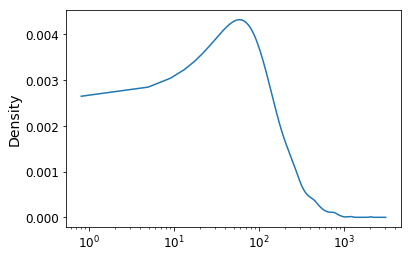

In [10]:
reviews = df.body
review_lengths = reviews.apply(lambda r: len(r))
review_lengths.plot(kind='kde', logx=True)

In [8]:
review_lengths.head()

0     67
1     58
2    104
3     42
4     40
Name: body, dtype: int64

In [11]:
### data preprocessing:
### score data was not in a numerical form so that needed to be taken care of 
### using if the review was helpful or not could be a good indicator of if others gave it a similar rating
### usefulness was then turned into a binary variable (1 if useful, 0 if not)
### names of reviewers was also found to be an important feature but it became evident that incincere
### reviews may come from overly dramaticized names so names were converted into name length 
### this will encompass two word names (since they get an extra 1 in their length) and superfluous
### single names. (so if you get a 1* review from fhwefhardgfsvsdv or Mrs. Dunwa Regionia ) the 
### two names would be considered similar regardless of stylistic composition of the name itself
training, validation = df.iloc[:681, :], df.iloc[681:, :]

for i in training.index:
    if df['rating'][i] == "['5.0 out of 5 stars']":
        df['rating'][i] = 5.0
    elif df['rating'][i] == "['4.0 out of 5 stars']":
        df['rating'][i] = 4.0
    elif df['rating'][i] == "['3.0 out of 5 stars']":
        df['rating'][i] = 3.0
    elif df['rating'][i] == "['2.0 out of 5 stars']":
        df['rating'][i] = 2.0
    elif df['rating'][i] == "['1.0 out of 5 stars']":
        df['rating'][i] = 1.0
for i in df.index:
    if df['helpful'][i] == "[]":
        df['helpful'][i] = 0.0
for i in df.index:
    if df['helpful'][i] != 0.0:
        df['helpful'][i] = 1.0
        
for i in training.index:
        a = df['author'][i]
        name_len = len(a)
        df['author'][i] = name_len
        
for i in training.index:
        df['body'][i] = review_lengths[i]
        
W = training.loc[:, 'author']
#name length 
X = training.loc[:, 'body']
#review length 
Y = training.loc[:, 'rating']
#score
Z = training.loc[:,'helpful']
#binary 1 yes people found it helpful, 0 no 

pd.value_counts(Z)

0.0    572
1.0    109
Name: helpful, dtype: int64

In [12]:


for i in validation.index:
    if df['rating'][i] == "['5.0 out of 5 stars']":
        df['rating'][i] = 5.0
    elif df['rating'][i] == "['4.0 out of 5 stars']":
        df['rating'][i] = 4.0
    elif df['rating'][i] == "['3.0 out of 5 stars']":
        df['rating'][i] = 3.0
    elif df['rating'][i] == "['2.0 out of 5 stars']":
        df['rating'][i] = 2.0
    elif df['rating'][i] == "['1.0 out of 5 stars']":
        df['rating'][i] = 1.0
for i in df.index:
    if df['helpful'][i] == "[]":
        df['helpful'][i] = 0.0
for i in df.index:
    if df['helpful'][i] != 0.0:
        df['helpful'][i] = 1.0
        
for i in validation.index:
        a = df['author'][i]
        name_len = len(a)
        df['author'][i] = name_len
        
for i in validation.index:
        df['body'][i] = review_lengths[i]
        
WW = validation.loc[:, 'author']
#name length 
XX = validation.loc[:, 'body']
#review length 
YY = validation.loc[:, 'rating']
#score
ZZ = validation.loc[:,'helpful']
#binary 1 yes people found it helpful, 0 no 


In [13]:
training.head()

,author,body,date,helpful,rating,title
0,16,67,"['on April 9, 2018']",0,1,['One Star']
1,22,58,"['on April 9, 2018']",0,1,['The one that does is mediocre at best.']
2,14,104,"['on April 9, 2018']",0,5,['Five Stars']
3,10,42,"['on April 9, 2018']",0,5,['Five Stars']
4,6,40,"['on April 9, 2018']",0,5,['Five Stars']


In [14]:
validation.head()

,author,body,date,helpful,rating,title
681,20,90,"['on November 3, 2017']",0,3,['Three Stars']
682,6,77,"['on November 3, 2017']",1,5,['My favorite small flashlight']
683,11,113,"['on November 1, 2017']",1,5,['Nice little torches']
684,7,40,"['on November 1, 2017']",1,5,['Police grade luminescence']
685,9,69,"['on November 1, 2017']",0,3,['Three Stars']


In [15]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
#ols = sm.ols(formula="Y ~ W + X + Z", data = training).fit()
#gives an error. Fixed in ols1. 

In [16]:
W = W.astype(float)
X = X.astype(float)
Y = Y.astype(float)
Z = Z.astype(float)
#ols1 = ols.get_robustcov_results(cov_type='HAC',maxlags=1)
ols1 = sm.ols(formula="Y ~ W + X + Z", data = training).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     10.52
Date:                Sat, 21 Apr 2018   Prob (F-statistic):           9.02e-07
Time:                        12:48:35   Log-Likelihood:                -1178.6
No. Observations:                 681   AIC:                             2365.
Df Residuals:                     677   BIC:                             2383.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3466      0.167     26.097      0.000       4.020       4.674
W             -0.0081      0.011     -0.749      0.454      -0.029       0.013
X             -0.0006      0.000     -1.955      0.051      -0.001    2.31e-06
Z             -0.6630      0.150     -4.424      0.000      -0.957      -0.369
==============================================================================
Omnibus:                       91.840   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.529
Skew:                          -1.065   Prob(JB):                     7.47e-29
Kurtosis:                       2.834   Cond. No.                         796.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

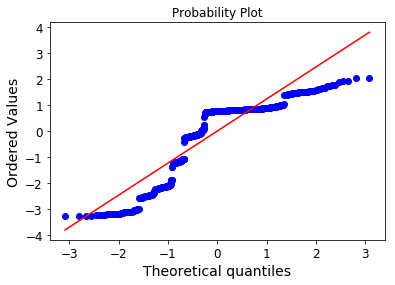

In [29]:
import matplotlib.pyplot as pyplot
from scipy import stats
import numpy as np 
import pylab

res = ols1.resid 
fig = stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

In [26]:
WW = WW.astype(float)
XX = XX.astype(float)
YY = YY.astype(float)
ZZ = ZZ.astype(float)
ols11 = sm.ols(formula="YY ~ WW + XX + ZZ", data = validation).fit()
ols11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YY   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     61.11
Date:                Sat, 21 Apr 2018   Prob (F-statistic):           5.85e-35
Time:                        12:58:00   Log-Likelihood:                -1033.7
No. Observations:                 679   AIC:                             2075.
Df Residuals:                     675   BIC:                             2094.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3132      0.145     29.743      0.000       4.028       4.598
WW             0.0100      0.009      1.093      0.275      -0.008       0.028
XX             0.0006      0.000      2.205      0.028    6.15e-05       0.001
ZZ            -1.5942      0.121    -13.172      0.000      -1.832      -1.357
==============================================================================
Omnibus:                       69.092   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.142
Skew:                          -0.835   Prob(JB):                     7.25e-20
Kurtosis:                       3.574   Cond. No.                         837.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

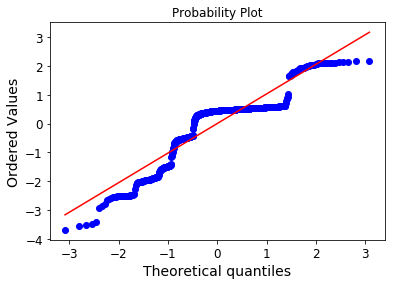

In [28]:
import matplotlib.pyplot as pyplot
from scipy import stats
import numpy as np 
import pylab

res = ols11.resid 
fig = stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

In [18]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

ols2 = sm.ols(formula="Y ~ W + X + Z + W*X + W*Z + X*Z + W*X*Z", data = training).fit()
ols2.summary()
#model is improved by adding interaction effects between factors

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     5.596
Date:                Sat, 21 Apr 2018   Prob (F-statistic):           2.75e-06
Time:                        12:48:51   Log-Likelihood:                -1174.9
No. Observations:                 681   AIC:                             2366.
Df Residuals:                     673   BIC:                             2402.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3602      0.259     16.862      0.000       3.852       4.868
W             -0.0016      0.018     -0.093      0.926      -0.036       0.033
X             -0.0007      0.001     -0.506      0.613      -0.003       0.002
Z             -1.1173      0.522     -2.142      0.033      -2.141      -0.093
W:X        -4.725e-05   9.53e-05     -0.496      0.620      -0.000       0.000
W:Z            0.0229      0.036      0.636      0.525      -0.048       0.093
X:Z            0.0021      0.002      1.241      0.215      -0.001       0.005
W:X:Z      -9.769e-05      0.000     -0.748      0.455      -0.000       0.000
==============================================================================
Omnibus:                       89.620   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.634
Skew:                          -1.050   Prob(JB):                     5.24e-28
Kurtosis:                       2.870   Cond. No.                     3.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
anova = anova_lm(ols2, typ=2)
print(anova)

               sum_sq     df          F    PR(>F)
W            1.015410    1.0   0.543818  0.461112
X            7.265063    1.0   3.890911  0.048957
Z           35.773028    1.0  19.158770  0.000014
W:X          4.321880    1.0   2.314646  0.128630
W:Z          0.106053    1.0   0.056798  0.811702
X:Z          4.060074    1.0   2.174432  0.140789
W:X:Z        1.044016    1.0   0.559138  0.454869
Residual  1256.617601  673.0        NaN       NaN


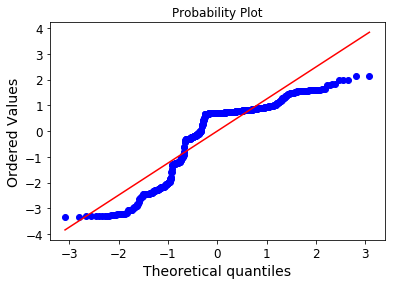

In [20]:
import matplotlib.pyplot as pyplot
from scipy import stats
import numpy as np 
import pylab

res = ols2.resid 
fig = stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

In [23]:
WW = WW.astype(float)
XX = XX.astype(float)
YY = YY.astype(float)
ZZ = ZZ.astype(float)
ols3 = sm.ols(formula="YY ~ WW + XX + ZZ + WW*XX + WW*ZZ + XX*ZZ + WW*XX*ZZ", data = validation).fit()
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YY   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.27
Date:                Sat, 21 Apr 2018   Prob (F-statistic):           1.07e-38
Time:                        12:51:57   Log-Likelihood:                -1016.8
No. Observations:                 679   AIC:                             2050.
Df Residuals:                     671   BIC:                             2086.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5513      0.209     21.768      0.000       4.141       4.962
WW             0.0032      0.014      0.226      0.821      -0.024       0.031
XX            -0.0010      0.001     -0.972      0.331      -0.003       0.001
ZZ            -1.9900      0.544     -3.661      0.000      -3.057      -0.923
WW:XX       4.086e-05   7.38e-05      0.554      0.580      -0.000       0.000
WW:ZZ         -0.0247      0.038     -0.656      0.512      -0.098       0.049
XX:ZZ          0.0021      0.002      1.168      0.243      -0.001       0.006
WW:XX:ZZ    6.631e-05      0.000      0.525      0.600      -0.000       0.000
==============================================================================
Omnibus:                       78.048   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.245
Skew:                          -0.804   Prob(JB):                     9.44e-26
Kurtosis:                       4.220   Cond. No.                     5.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

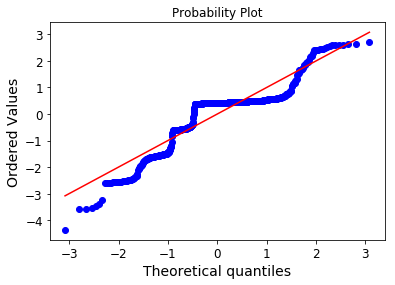

In [27]:
import matplotlib.pyplot as pyplot
from scipy import stats
import numpy as np 
import pylab

res = ols3.resid 
fig = stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

In [ ]:
#anova is the better of the two models since it accounts for the interaction
#effects between factors and provide greater insight on the overall relationships between the data
#it also has the most significant improvement in regards to its r squared explanatory statistic and 
# f statistic when translated onto the validation data set. 

#because the anova impoved upon one's understanding of the relationships found within data sets and 
#yields better results, the anova is the more optimal model. 